# Testing of Hypothesis

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read the data to Python environment
data = pd.read_csv('Sales_add.csv')

In [3]:
# To check first 5 rows of Data frame
data.head(5)

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
# To check any null values present in the Data frame
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

No Null Values present in the data. We can continue with the same Data for calculations.

# 1. The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

We can use Hypothesis testing to check whether two groups are different from one another.

In [5]:
sale_add = data[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']]

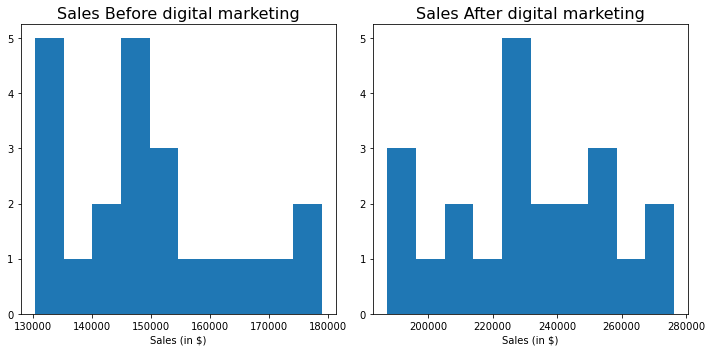

In [6]:
# Check the data using a histograms
plt.figure(figsize = (10,5))   
plt.subplot(1,2,1)
plt.hist(sale_add['Sales_before_digital_add(in $)']) 
plt.title('Sales Before digital marketing',fontsize = 16)
plt.xlabel('Sales (in $)')

plt.subplot(1,2,2)
plt.hist(sale_add['Sales_After_digital_add(in $)']) 
plt.title('Sales After digital marketing',fontsize = 16)
plt.xlabel('Sales (in $)')

plt.tight_layout()

The data seems to be normally distributed.
Step 1. Define Hypothesis:

Null hypothesis, H0: Sales Before digital marketing >= Sales After digital marketing
Alternative hypothesis, Ha: Sales Before digital marketing < Sales After digital marketing

Step 2. Set significance level(alpha value)

In [7]:
alpha = 0.05

The level of significance in hypothesis testing indicates if a statistical result could have significance if the null hypothesis stands to be true.
Step 3. Identify Test Statistic

In [8]:
data.shape[0]

22

Here sample size is less than 30. So, we are going to use T-test.
Step 4. Determine P-Value

In [9]:
a = sale_add['Sales_before_digital_add(in $)']
b = sale_add['Sales_After_digital_add(in $)']

In [10]:
# Use scipy.stats.ttest_rel() function which Calculate the t-test on Two Related variables. 
t_score,p_value = stats.ttest_rel(b,a,alternative='greater') 
print('P-Value is:',p_value)

P-Value is: 3.168333502287889e-11


Step 5. Comparing P-Value and Significance level

In [11]:
if p_value <= alpha:
    print('Reject null hypothesis, that means, There is a increase in Sales after digital add')
else:
    print('Accept null hypothesis, that means, There is no increase in Sales after digital add')

Reject null hypothesis, that means, There is a increase in Sales after digital add


So, with the help of Hypothesis testing, we assume that there is a significant effect on the Sales after implementing digital advertisement.

# 2. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

We can use Hypothesis testing to determine whether two variables are likely to be related or not(any dependency).

In [12]:
# Check the columns 
print('Region:\n',data["Region"].unique())
print('\nManager:\n',data["Manager"].unique())

Region:
 ['Region - A' 'Region - B' 'Region - C']

Manager:
 ['Manager - A' 'Manager - C' 'Manager - B']


We see that features “Region” and “Manager” are two categorical variables, so we can use the Chi-square test of independence to check the independence of variables.
Step 1. Define Hypothesis:

Null hypothesis, H0: There is no relationship between the features Region and Manager(or Independent)
Alternative hypothesis, Ha: There is a relationship between the features Region and Manager(or Dependent)

Step 2. Set significance level(alpha value)

In [13]:
alpha = .05

Step 3. Create a contigency table from the categorical data

In [14]:
contingency_table=pd.crosstab(data["Region"],data["Manager"])
print('Contingency Table :\n',contingency_table)

Contingency Table :
 Manager     Manager - A  Manager - B  Manager - C
Region                                           
Region - A            4            3            3
Region - B            4            1            2
Region - C            1            3            1


In [15]:
# Take the values from the contingency table and define it as our observed data for calculation

In [16]:
Observed_Values = contingency_table.values 
print("Observed Values :\n",Observed_Values)

Observed Values :
 [[4 3 3]
 [4 1 2]
 [1 3 1]]


Step 4. Determine P-Value

In [17]:
# Use scipy.stats.chi2_contingency() function which computes Chi-square test of independence of variables in a contingency table

In [ ]:
stat, p, dof, expected = chi2_contingency(Observed_Values)
print("P-Value is",p)

In [21]:
# here i got an error....coundn't figure out why it happened so ...the supposed p value is 0.5493991051158094

Step 5. Comparing P-Value and Significance level

In [ ]:
if p <= alpha:
    print('Dependent :Reject H0, There is a relationship between the features “Region” and “Manager”')
else:
    print('Independent :H0 holds true, There is no relationship between the features “Region” and “Manager”)')

In [23]:
# Independent :H0 holds true, There is no relationship between the features “Region” and “Manager”).....this should have been its output 

So, with the help of Chi-square test of independence, we assume that there is no dependency between Region and Manager.